In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print(f'TensorFlow {tf.__version__}')

TensorFlow 2.9.3


# 데이터 전처리

1. 적재 (Load)
1. 전처리 (preprocessing)

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    '../data/cats_and_dogs_filtered/train/',
    image_size=(180, 180), batch_size=32)

validation_dataset = image_dataset_from_directory(
    '../data/cats_and_dogs_filtered/validation/', 
    image_size=(180, 180), batch_size=32)

Found 2006 files belonging to 2 classes.


2023-02-22 01:57:22.929920: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-22 01:57:22.933212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-22 01:57:22.933246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-22 01:57:22.933473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Found 1000 files belonging to 2 classes.


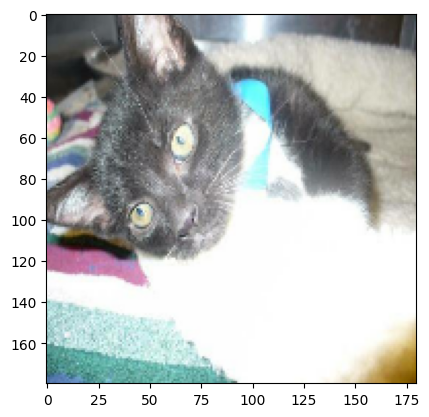

In [4]:
sample_image = sample_batch[3].numpy().astype('uint8')
plt.imshow(sample_image)

# 모델 제작 (신경망 설계)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def create_model(name=None):
    model = keras.Sequential([
        keras.Input(shape=(180, 180, 3)),
        layers.Rescaling(1./255), # 단위 정규화 [0, 1]
        layers.Conv2D(32, kernel_size=3, activation='relu'),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(64, kernel_size=3, activation='relu'),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(128, kernel_size=3, activation='relu'),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(256, kernel_size=3, activation='relu'),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(256, kernel_size=3, activation='relu'),
        # 출력
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid', name='output')
    ], name=name)
    return model

In [6]:
model = create_model(name='cats_and_dogs')
model.summary()

Model: "cats_and_dogs"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)     

In [7]:
callbacks = lambda checkpoint_path: [
    keras.callbacks.ModelCheckpoint(
        checkpoint_path, 
        save_best_only=True, 
        monitor='val_loss'),
    # keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]

In [8]:
callbacks('../checkpoints/cats_and_dogs.keras')

In [10]:
from tensorflow.keras import losses, optimizers

model = create_model()
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(), metrics=['acc'])
history = model.fit(
    train_dataset, epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks('../checkpoints/cats_and_dogs.keras'))

Epoch 1/30


2023-02-22 01:59:33.862408: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-02-22 01:59:34.804496: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-22 01:59:34.805344: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-22 01:59:34.805368: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-02-22 01:59:34.805655: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-22 01:59:34.805705: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-02-22 01:59:36.351075: I tensorflow/stream_executor/cuda/c

63/63 [==============================] - 6s 30ms/step - loss: 0.7179 - acc: 0.5184 - val_loss: 0.6908 - val_acc: 0.5030
Epoch 2/30
63/63 [==============================] - 1s 24ms/step - loss: 0.7055 - acc: 0.5608 - val_loss: 0.6675 - val_acc: 0.6230
Epoch 3/30
63/63 [==============================] - 1s 23ms/step - loss: 0.6605 - acc: 0.6097 - val_loss: 0.6385 - val_acc: 0.6290
Epoch 4/30
63/63 [==============================] - 1s 23ms/step - loss: 0.6172 - acc: 0.6795 - val_loss: 0.6200 - val_acc: 0.6520
Epoch 5/30
63/63 [==============================] - 1s 23ms/step - loss: 0.5690 - acc: 0.7064 - val_loss: 0.6145 - val_acc: 0.6850
Epoch 6/30
63/63 [==============================] - 1s 23ms/step - loss: 0.5364 - acc: 0.7378 - val_loss: 0.5573 - val_acc: 0.7190
Epoch 7/30
63/63 [==============================] - 1s 23ms/step - loss: 0.4813 - acc: 0.7622 - val_loss: 0.6290 - val_acc: 0.7040
Epoch 8/30
63/63 [==============================] - 1s 23ms/step - loss: 0.4486 - acc: 0.7916 

In [12]:
train_results = pd.DataFrame(history.history)
train_results[-5:]

,loss,acc,val_loss,val_acc
25,0.078409,0.976570,1.889893,0.734
26,0.046814,0.986540,1.861664,0.737
27,0.042491,0.990030,2.254651,0.713
28,0.044003,0.985543,2.402496,0.707
29,0.042032,0.986042,2.078507,0.731


<Axes: >

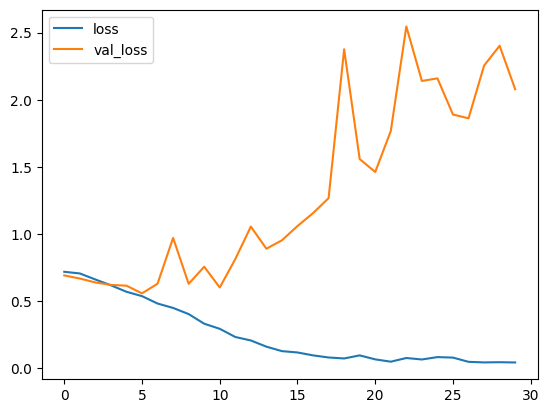

In [14]:
train_results[['loss', 'val_loss']].plot()

문제: 과적합

원인?

1. 모델 가설공간 (설계로써 결정된다)
1. 부족한 데이터

## 데이터 증식 (Data Augmentation)

In [15]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

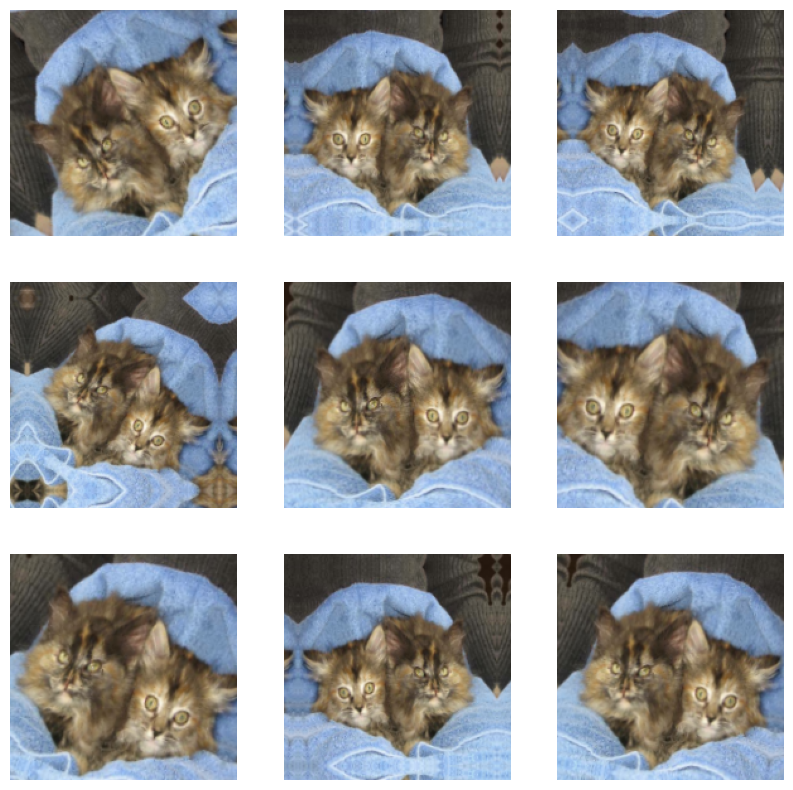

In [22]:
plt.figure(figsize=(10, 10))

for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

def create_model(name=None):
    model = keras.Sequential([
        keras.Input(shape=(180, 180, 3)),
        data_augmentation,
        layers.Rescaling(1./255), # 단위 정규화 [0, 1]
        layers.Conv2D(32, kernel_size=3, activation='relu'),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(64, kernel_size=3, activation='relu'),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(128, kernel_size=3, activation='relu'),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(256, kernel_size=3, activation='relu'),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(256, kernel_size=3, activation='relu'),
        # 출력
        layers.Flatten(),
        layers.Dropout(0.5), # 과적합 개선용
        layers.Dense(1, activation='sigmoid', name='output')
    ], name=name)
    return model

In [35]:
from tensorflow.keras import losses, optimizers

model = create_model()
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(), metrics=['acc'])
history = model.fit(
    train_dataset, epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks('../checkpoints/cats_and_dogs_augmented.keras'))

Epoch 1/100
63/63 [==============================] - 4s 48ms/step - loss: 0.7211 - acc: 0.5060 - val_loss: 0.6896 - val_acc: 0.5520
Epoch 2/100
63/63 [==============================] - 3s 46ms/step - loss: 0.7028 - acc: 0.5254 - val_loss: 0.6882 - val_acc: 0.5720
Epoch 3/100
63/63 [==============================] - 3s 46ms/step - loss: 0.6867 - acc: 0.5513 - val_loss: 0.6439 - val_acc: 0.6250
Epoch 4/100
63/63 [==============================] - 3s 45ms/step - loss: 0.6741 - acc: 0.5763 - val_loss: 0.6458 - val_acc: 0.6530
Epoch 5/100
63/63 [==============================] - 3s 46ms/step - loss: 0.6508 - acc: 0.6191 - val_loss: 0.6081 - val_acc: 0.6780
Epoch 6/100
63/63 [==============================] - 3s 45ms/step - loss: 0.6251 - acc: 0.6486 - val_loss: 0.6120 - val_acc: 0.6760
Epoch 7/100
63/63 [==============================] - 3s 46ms/step - loss: 0.6226 - acc: 0.6715 - val_loss: 0.6746 - val_acc: 0.6230
Epoch 8/100
63/63 [==============================] - 3s 45ms/step - loss: 0.

In [36]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                 

In [40]:
train_results = pd.DataFrame(history.history)
train_results[-5:]

,loss,acc,val_loss,val_acc
95,0.209613,0.927218,0.781110,0.852
96,0.155530,0.938185,0.767610,0.854
97,0.180121,0.941675,1.017346,0.843
98,0.176067,0.942672,0.719535,0.855
99,0.191145,0.932702,0.812646,0.822


In [41]:
train_results['val_acc'].max()

0.8650000095367432

<Axes: >

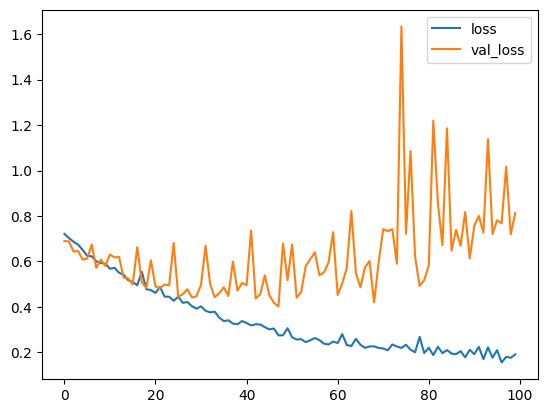

In [39]:
train_results[['loss', 'val_loss']].plot()

## 전이 학습

대규모 데이터에 대해 사전 훈련된 모형을 기반 모델로 사용하여 응용 모형 성능 개선

In [51]:
vgg16 = keras.applications.vgg16.VGG16(weights="imagenet")
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [52]:
from tensorflow.keras.utils import load_img, img_to_array

모찌 = load_img('../data/mozzi.jpg', target_size=(224, 224))
x1 = img_to_array(모찌)
x1 = keras.applications.vgg16.preprocess_input(x1)

In [56]:
with tf.device('CPU'):
    모찌 = load_img('../data/mozzi.jpg', target_size=(224, 224))
    x1 = img_to_array(모찌)
    x1 = keras.applications.vgg16.preprocess_input(x1)
    vgg16 = keras.applications.vgg16.VGG16(weights="imagenet")
    X_new = np.array([x1])
    Y_pred = vgg16.predict(X_new)

1/1 [==============================] - 0s 124ms/step


In [55]:
np.argmax(Y_pred, axis=1)

array([153])

In [57]:
np.max(Y_pred, axis=1)

array([0.9218279], dtype=float32)

In [62]:
np.argsort(Y_pred, axis=1)[0, -3:]

array([187, 203, 153])

In [63]:
Y_pred[0, [153, 203, 187]]

array([0.9218279 , 0.02530332, 0.0170687 ], dtype=float32)

In [65]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [72]:
def create_model(base_model):
    model = keras.Sequential([
        base_model,
        # 응용에 맞게 출력층 설정 (훈련 필요)
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

create_model(conv_base).summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 12800)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               3277056   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 17,992,001
Trainable params: 3,277,313
Non-trainable params: 14,714,688
_________________________________________________________________


In [75]:
from tensorflow.keras import losses, optimizers

# base model
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet', include_top=False, input_shape=(180, 180, 3))
conv_base.trainable = False
# 응용 모델
model = create_model(conv_base)
# 응용 모델 훈련
model.compile(loss=losses.binary_crossentropy, optimizer=optimizers.RMSprop(), metrics=['acc'])
history = model.fit(
    train_dataset, epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks('../checkpoints/cats_and_dogs_vgg16_base.keras'))

Epoch 1/20
63/63 [==============================] - 4s 50ms/step - loss: 8.3634 - acc: 0.8863 - val_loss: 0.6883 - val_acc: 0.9570
Epoch 2/20
63/63 [==============================] - 3s 48ms/step - loss: 0.5371 - acc: 0.9531 - val_loss: 0.4850 - val_acc: 0.9570
Epoch 3/20
63/63 [==============================] - 3s 47ms/step - loss: 0.3107 - acc: 0.9676 - val_loss: 0.6679 - val_acc: 0.9520
Epoch 4/20
63/63 [==============================] - 3s 49ms/step - loss: 0.3581 - acc: 0.9711 - val_loss: 0.4202 - val_acc: 0.9670
Epoch 5/20
63/63 [==============================] - 3s 48ms/step - loss: 0.1648 - acc: 0.9835 - val_loss: 0.4770 - val_acc: 0.9620
Epoch 6/20
63/63 [==============================] - 3s 49ms/step - loss: 0.1333 - acc: 0.9860 - val_loss: 0.7565 - val_acc: 0.9610
Epoch 7/20
63/63 [==============================] - 3s 48ms/step - loss: 0.3033 - acc: 0.9816 - val_loss: 0.6754 - val_acc: 0.9650
Epoch 8/20
63/63 [==============================] - 3s 48ms/step - loss: 0.1640 - a

### 특성 추출 후 응용 모델 구성

1. 기반 모델로 특성 추출
1. 응용 모델의 입력으로 전달

In [76]:
for images, labels in train_dataset.take(1):
    # 전처리
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    # 기반 모델로 입력을 처리
    features = conv_base(preprocessed_images)
    
features.shape

TensorShape([32, 5, 5, 512])

In [78]:
to_image = lambda tensor: tensor.numpy().astype('uint8')

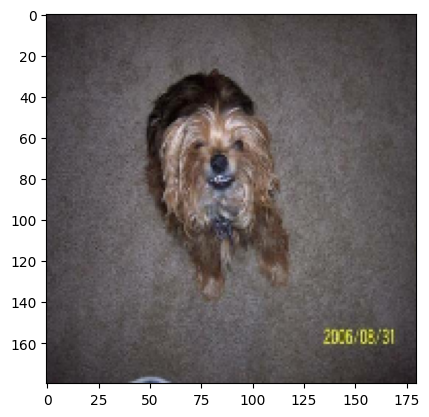

In [79]:
plt.imshow(to_image(images[0]))

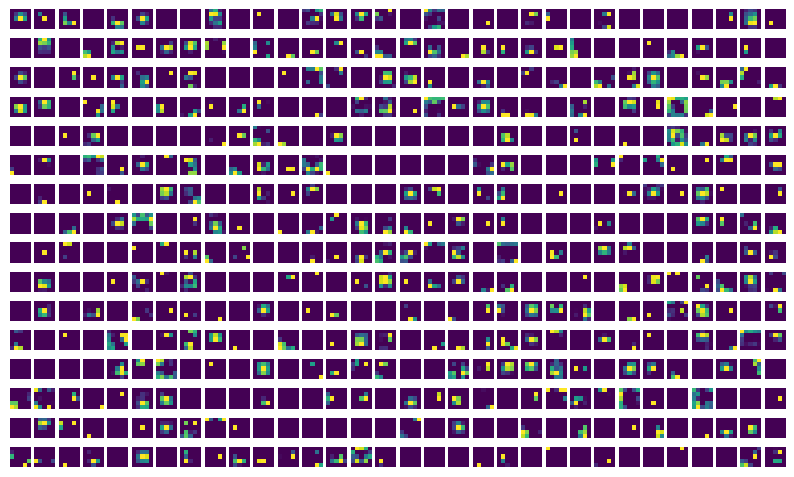

In [87]:
fig, subplots = plt.subplots(16, 32, figsize=(10, 6))
for k in range(features.shape[-1]):
    ax = subplots.ravel()[k]
    ax.imshow(features[0, :, :, k])
    ax.axis('off')

In [90]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        all_labels.append(labels)
        # 전처리
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        # 기반 모델로 입력을 처리
        features = conv_base(preprocessed_images)
        all_features.append(features)
        
    return np.concatenate(all_features), np.concatenate(all_labels)

In [93]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)

In [92]:
train_features.shape, train_labels.shape

((2006, 5, 5, 512), (2006,))

In [94]:
val_features.shape, val_labels.shape

((1000, 5, 5, 512), (1000,))